In [146]:
from sklearn import tree
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
%matplotlib inline

# fit a quadratic function

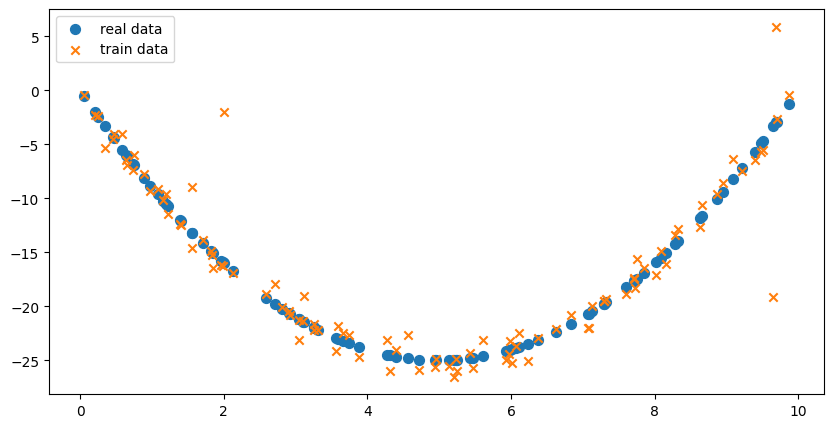

In [202]:
# we will polyfit y = x**2 - 10x in this code
# create dataset
steps = 100     # number of features
np.random.seed(42)
raw_data = np.array(sorted(np.random.rand(steps) * 10))  # shape : (200, )  data range(0, 10)
raw_data = raw_data[:, np.newaxis]  # shape: (200, 1)

features = np.concatenate([raw_data ** 2, raw_data], axis=1)    # train feature
y = features[:, 0] - features[:, 1] * 10   # (200, ) real data
label = y + np.random.randn(steps)    # add noise which mean is 0 and std is 50
idx_noise = np.random.randint(0, steps, size=5) # add big noize to some points
label[idx_noise] += np.random.randn(len(idx_noise)) * 10

# visualize data
plt.figure(figsize=(10, 5))
plt.scatter(raw_data, y, marker='o', s=50, label='real data')
plt.scatter(raw_data, label, marker='x',label='train data')
plt.legend()
plt.show()

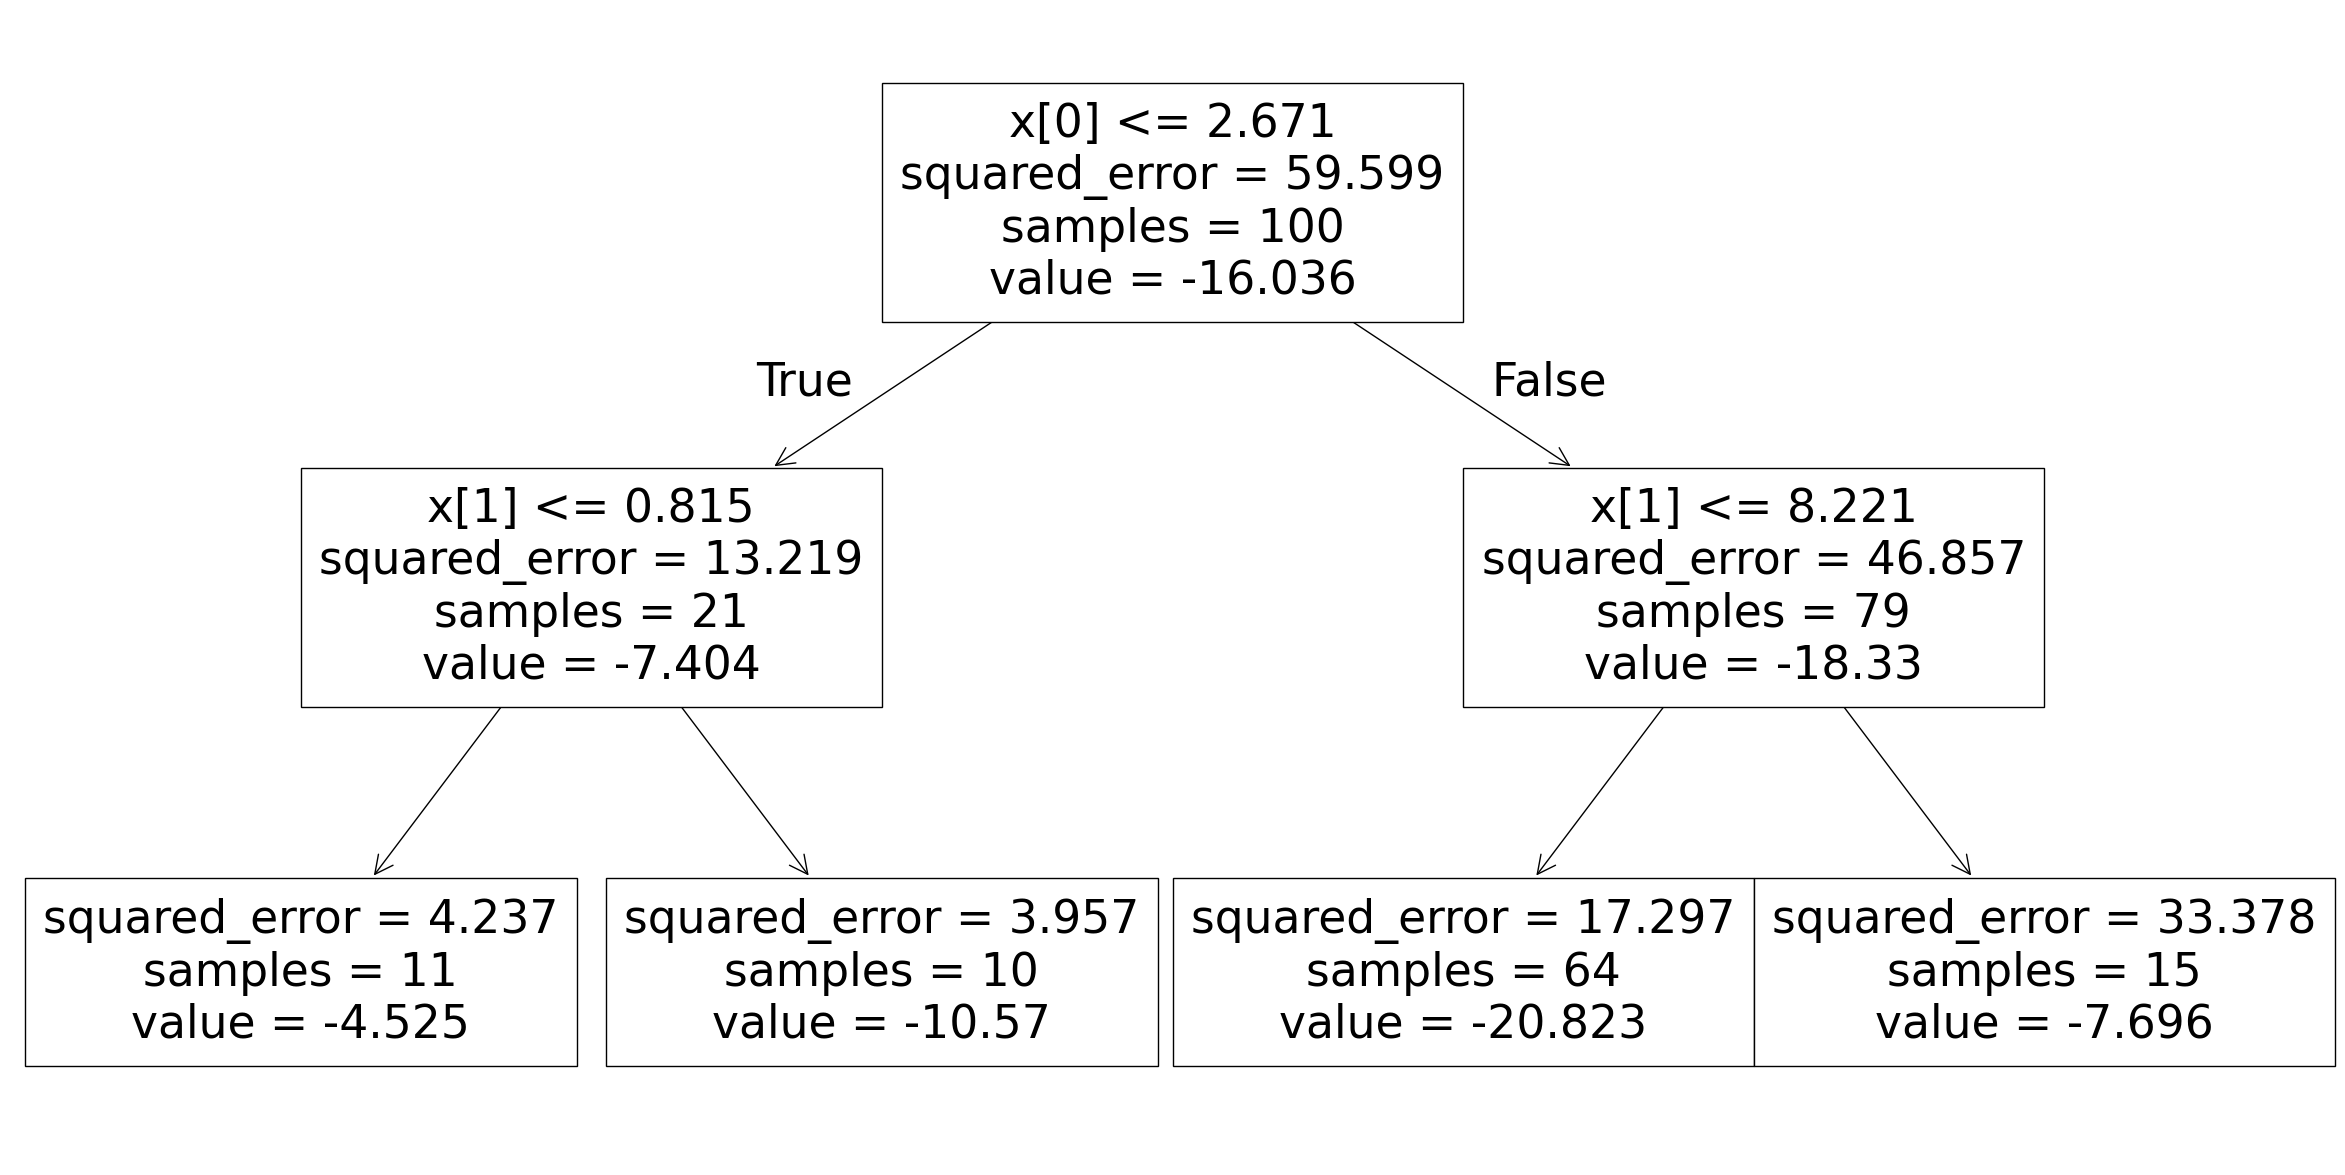

In [226]:
# use decision tree regression to fit data
clf1 = tree.DecisionTreeRegressor(
    max_depth=2
)
clf1 = clf1.fit(features, label)
clf2 = tree.DecisionTreeRegressor(
    max_depth=5
)
clf2 = clf2.fit(features, label)

# visualize the decision tree
plt.figure(figsize=(30, 15))
tree.plot_tree(clf1)
plt.show()

In [204]:
# try use mlp
import torch
import torch.nn as nn
import torch.nn.functional as F

torch.manual_seed(42)

train_X, train_y = torch.tensor(features, dtype=torch.float32), torch.tensor(label, dtype=torch.float32)    # (50, 2), (50, )
num_epochs = 10000
batch_size = 4
num_hiddens = 256
lr = 0.00005

W1 = torch.randn(2, num_hiddens) ; b1 = torch.zeros(num_hiddens)
W2 = torch.randn(num_hiddens, 1) ; b2 = torch.zeros(1)

parameters = [W1, b1, W2, b2]
for p in parameters:
    p.requires_grad_()

lossi = []
for epoch in range(num_epochs):
    idx = torch.randint(0, steps, size=(batch_size, ))
    X, y = train_X[idx], train_y[idx]   # (batch_size, 2), (batch_size, )
    
    # forward pass
    x = torch.matmul(X, W1) + b1    # (batch_size, 2) @ (2, num_hiddens) + (1, )  -> (batch_size, num_hiddens)
    x = torch.tanh(x)            
    outputs = torch.matmul(x, W2) + b2    # (batch_size, num_hiddens) @ (num_hiddens, 1) + (1, ) -> (batch_size, 1)
    
    l = 0.0
    for i, output in enumerate(outputs):
        l += (output - y[i]) ** 2
    l /= batch_size
    
    # backward pass
    for p in parameters:
        p.grad = None
    l.backward()
    for p in parameters:
        p.data += -lr * p.grad
    
    # track stats
    lossi.append(l.item())
    if epoch % 20 ==0:
        print(f'epoch {epoch:7d}, loss {l.item() :10f}')
        
print(f'epoch {epoch:7d}, loss {l.item() :10f}')

epoch       0, loss  48.667503
epoch      20, loss  51.426178
epoch      40, loss  45.591408
epoch      60, loss   4.335782
epoch      80, loss  12.581885
epoch     100, loss   3.295040
epoch     120, loss   1.266892
epoch     140, loss 126.153076
epoch     160, loss  50.607758
epoch     180, loss   6.286034
epoch     200, loss   2.928089
epoch     220, loss   2.668137
epoch     240, loss   1.572755
epoch     260, loss   4.327916
epoch     280, loss   1.608699
epoch     300, loss  13.930016
epoch     320, loss  11.535930
epoch     340, loss   3.857092
epoch     360, loss   1.497359
epoch     380, loss   9.175217
epoch     400, loss  39.808174
epoch     420, loss   9.662374
epoch     440, loss  15.451073
epoch     460, loss   9.045795
epoch     480, loss   7.034879
epoch     500, loss   7.656817
epoch     520, loss   1.748837
epoch     540, loss   0.809283
epoch     560, loss   0.098712
epoch     580, loss  51.392513
epoch     600, loss  68.202133
epoch     620, loss  19.445608
epoch   

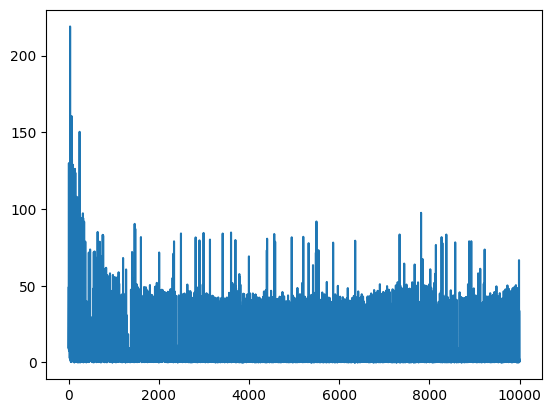

In [205]:
plt.plot(lossi)
plt.show()

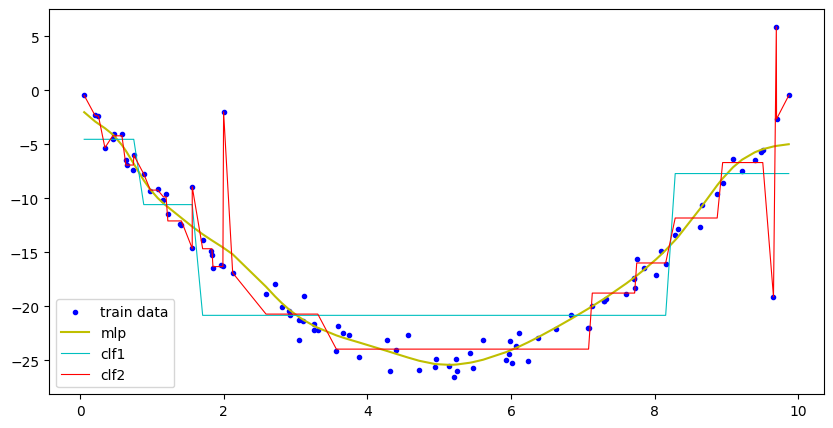

In [225]:
predict_y = []
with torch.no_grad():
    for x in train_X:
        x = x.unsqueeze(dim=0)  # (1, 2)
        # forward pass
        x = torch.matmul(x, W1) + b1    # (batch_size, 2) @ (2, num_hiddens) + (1, )  -> (batch_size, num_hiddens)
        x = torch.tanh(x)            
        output = torch.matmul(x, W2) + b2    # (batch_size, num_hiddens) @ (num_hiddens, 1) + (1, ) -> (batch_size, 1)
        predict_y.append(output.item())
        
plt.figure(figsize=(10, 5))
plt.scatter(raw_data.ravel(), label, marker='.', c='b', label='train data')
plt.plot(raw_data.ravel(), predict_y, label='mlp', c ='y')
plt.plot(raw_data, clf1.predict(features), label='clf1', linewidth=0.8, c='c')
plt.plot(raw_data, clf2.predict(features), label='clf2', linewidth=0.8, c='r')
plt.legend()
plt.show()